In [78]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [79]:
# loading train data
train_data = pd.read_csv('processed-data.csv')
train_data.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [81]:
# data clean and set target
target = 'Difficulty-in-Breathing'
x_data = train_data
y_data = train_data[target]
x_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tiredness,316800.0,0.500000,0.500001,0.0,0.0,0.5,1.00,1.0
Dry-Cough,316800.0,0.562500,0.496079,0.0,0.0,1.0,1.00,1.0
Difficulty-in-Breathing,316800.0,0.500000,0.500001,0.0,0.0,0.5,1.00,1.0
Sore-Throat,316800.0,0.312500,0.463513,0.0,0.0,0.0,1.00,1.0
None_Sympton,316800.0,0.062500,0.242062,0.0,0.0,0.0,0.00,1.0
Pains,316800.0,0.363636,0.481046,0.0,0.0,0.0,1.00,1.0
Nasal-Congestion,316800.0,0.545455,0.497930,0.0,0.0,1.0,1.00,1.0
Runny-Nose,316800.0,0.545455,0.497930,0.0,0.0,1.0,1.00,1.0
None_Experiencing,316800.0,0.090909,0.287480,0.0,0.0,0.0,0.00,1.0
Age_0-9,316800.0,0.200000,0.400001,0.0,0.0,0.0,0.00,1.0


D:\pycharm\Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\pycharm\Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\pycharm\Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\pycharm\Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

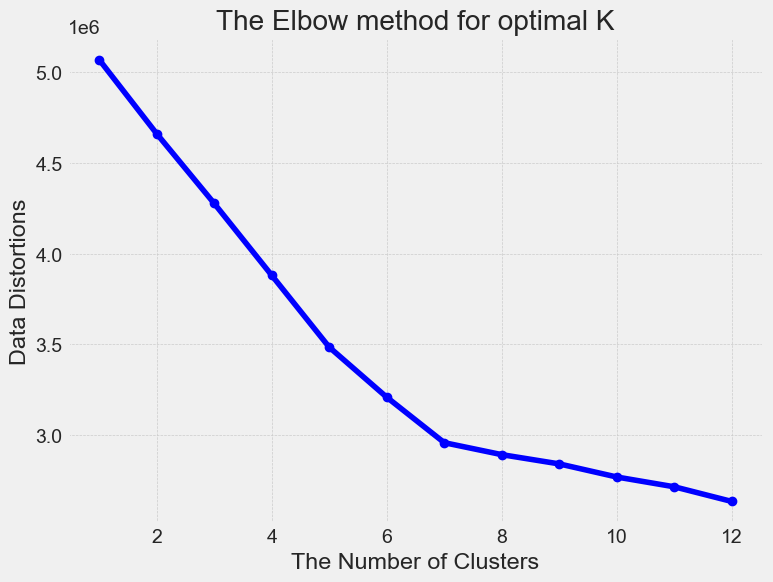

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
# Standardize the data
scaler = StandardScaler()
cluster_data = scaler.fit_transform(x_data)

# Calculate the distortion (inertia) for a range of clusters
def distortion_calculate(dataset, max):
    ans = []
    for i in range(1, max + 1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(dataset)
        ans.append(kmeans.inertia_)
    return ans


max_number_of_clusters = 12

data_distortions = distortion_calculate(cluster_data, max_number_of_clusters)

# Plot the elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_number_of_clusters + 1), data_distortions, marker='o', linestyle='-', color='b')
plt.xlabel('The Number of Clusters')
plt.ylabel('Data Distortions')
plt.title('The Elbow method for optimal K')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [83]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_data)
# Perform K-means clustering with 7 clusters
k_means = KMeans(n_clusters=7, random_state=0)
label_of_cluster = k_means.fit_predict(scaled_data)

# Add the cluster labels as a new column in the DataFrame
x_data['label_of_cluster'] = label_of_cluster
number_of_clusters = 7
x_data

D:\pycharm\Projects\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None,label_of_cluster
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,4
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,4
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,4
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,4
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


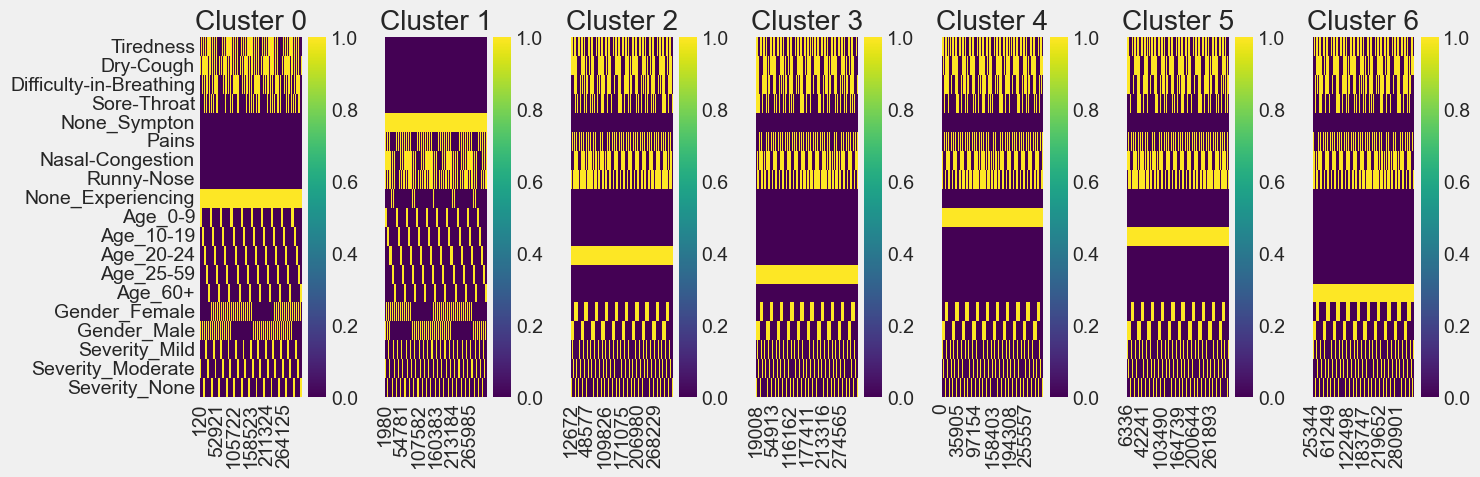

In [84]:
# Create subplots for each cluster
figure, axes = plt.subplots(1, number_of_clusters, figsize=(15, 5), sharey=True)

# Iterate through clusters and create heatmaps
for cluster in range(number_of_clusters):
    the_cluster_data = x_data[x_data['label_of_cluster'] == cluster].drop(columns=['label_of_cluster'])
    sns.heatmap(the_cluster_data.T, cmap='viridis', ax=axes[cluster])
    axes[cluster].set_title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()

In [85]:
# Remove irrelevant features
x_data = x_data.drop("label_of_cluster" , axis= 1)
x_data = x_data.drop(target , axis= 1)
x_data = x_data.drop("Gender_Female" , axis= 1)
x_data = x_data.drop("Gender_Male" , axis= 1)
x_data

,Tiredness,Dry-Cough,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0
1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0
2,1,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0
3,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
4,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
316796,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
316797,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
316798,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

scaler = MinMaxScaler()

X_data = scaler.fit_transform(x_data)
Y_data = scaler.fit_transform(y_data.values.reshape(-1 , 1))
print(f'The shape of X_data is {X_data.shape}')
print(f'The shape of y_data is {Y_data.shape}')

The shape of X_data is (316800, 16)
The shape of y_data is (316800, 1)


In [88]:
X_train , X_test , y_train , y_test = train_test_split(X_data, Y_data , test_size = 0.2 , random_state = 42)

neural_model = Sequential()
neural_model.add(Dense(9, activation='relu', input_dim=16))
neural_model.add(Dense(9, activation='relu'))
neural_model.add(Dense(1, activation='linear'))

neural_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
neural_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 9)                 153       
                                                                 
 dense_25 (Dense)            (None, 9)                 90        
                                                                 
 dense_26 (Dense)            (None, 1)                 10        
                                                                 
Total params: 253 (1012.00 Byte)
Trainable params: 253 (1012.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [89]:
log = neural_model.fit(X_train , y_train , epochs = 8 , validation_split= 0.2)

Epoch 1/8
6336/6336 [==============================] - 7s 1ms/step - loss: 0.1716 - mean_absolute_error: 0.3415 - val_loss: 0.1585 - val_mean_absolute_error: 0.3244
Epoch 2/8
6336/6336 [==============================] - 6s 990us/step - loss: 0.1572 - mean_absolute_error: 0.3198 - val_loss: 0.1575 - val_mean_absolute_error: 0.3191
Epoch 3/8
6336/6336 [==============================] - 6s 1ms/step - loss: 0.1568 - mean_absolute_error: 0.3185 - val_loss: 0.1581 - val_mean_absolute_error: 0.3213
Epoch 4/8
6336/6336 [==============================] - 6s 1ms/step - loss: 0.1566 - mean_absolute_error: 0.3177 - val_loss: 0.1575 - val_mean_absolute_error: 0.3206
Epoch 5/8
6336/6336 [==============================] - 6s 981us/step - loss: 0.1566 - mean_absolute_error: 0.3169 - val_loss: 0.1573 - val_mean_absolute_error: 0.3176
Epoch 6/8
6336/6336 [==============================] - 6s 992us/step - loss: 0.1565 - mean_absolute_error: 0.3166 - val_loss: 0.1571 - val_mean_absolute_error: 0.3157
Epoc

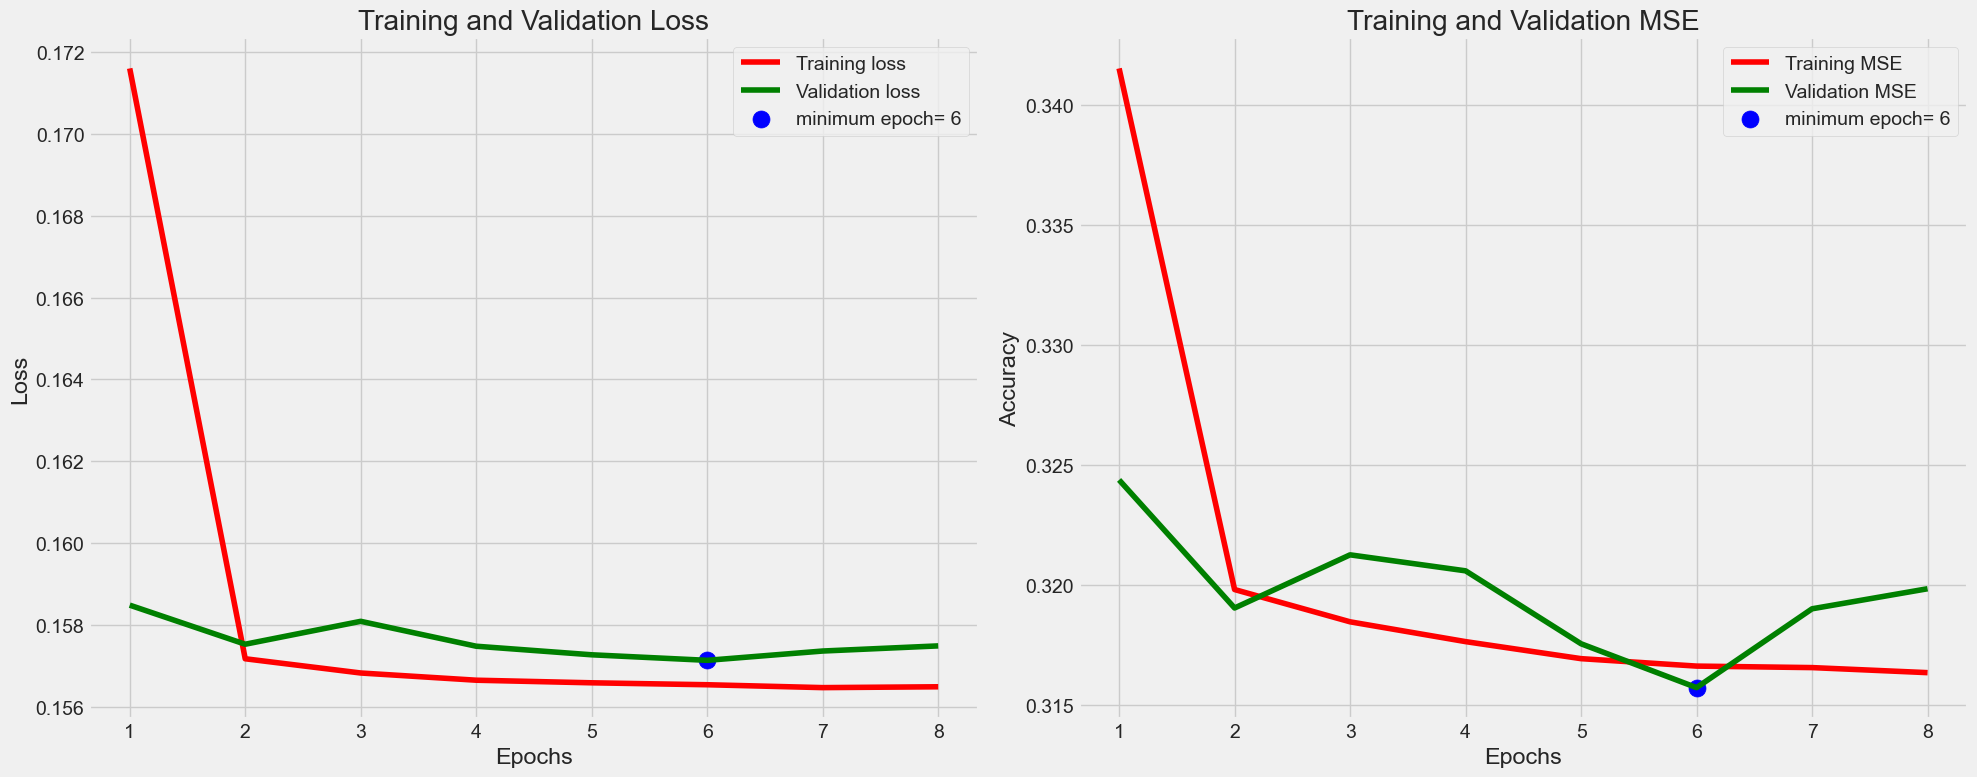

In [90]:
train_mse = log.history['mean_absolute_error']
train_loss = log.history['loss']
valid_mse = log.history['val_mean_absolute_error']
valid_loss = log.history['val_loss']
index_loss = np.argmin(valid_loss)
valid_lowest = valid_loss[index_loss]
index_mse = np.argmin(valid_mse)
mse_highest = valid_mse[index_mse]
Epochs = [i+1 for i in range(len(train_mse))]
loss_label = f'minimum epoch= {str(index_loss + 1)}'
mse_label = f'minimum epoch= {str(index_mse + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, train_loss, 'r', label= 'Training loss')
plt.plot(Epochs, valid_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, valid_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, train_mse, 'r', label= 'Training MSE')
plt.plot(Epochs, valid_mse, 'g', label= 'Validation MSE')
plt.scatter(index_mse + 1 , mse_highest, s= 150, c= 'blue', label= mse_label)
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [91]:
y_pred = neural_model.predict(X_test)
test_r2_score = r2_score(y_test , y_pred)
print(f'Test Set R2 Score = {test_r2_score}')

1980/1980 [==============================] - 1s 679us/step
Test Set R2 Score = 0.37404320632787214


In [100]:

artificial_model = Sequential()

artificial_model.add(Dense(units = 4, kernel_initializer = 'he_uniform',activation='relu',input_dim = 16)) 

artificial_model.add(Dense(units = 4, kernel_initializer = 'he_uniform',activation='relu')) 

artificial_model.add(Dense(units= 1 ,kernel_initializer='glorot_uniform',activation="sigmoid")) 


artificial_model.compile(optimizer='Adamax',loss="binary_crossentropy",metrics=["mae"])

artificial_log = artificial_model.fit(X_train, y_train, validation_split = 0.20 , batch_size = 10 , epochs = 8)

Epoch 1/8
20276/20276 [==============================] - 20s 975us/step - loss: 0.5152 - mae: 0.3599 - val_loss: 0.4580 - val_mae: 0.3285
Epoch 2/8
20276/20276 [==============================] - 21s 1ms/step - loss: 0.4416 - mae: 0.3181 - val_loss: 0.4396 - val_mae: 0.3164
Epoch 3/8
20276/20276 [==============================] - 20s 995us/step - loss: 0.4363 - mae: 0.3141 - val_loss: 0.4374 - val_mae: 0.3152
Epoch 4/8
20276/20276 [==============================] - 20s 983us/step - loss: 0.4355 - mae: 0.3133 - val_loss: 0.4372 - val_mae: 0.3148
Epoch 5/8
20276/20276 [==============================] - 20s 993us/step - loss: 0.4351 - mae: 0.3130 - val_loss: 0.4372 - val_mae: 0.3146
Epoch 6/8
20276/20276 [==============================] - 20s 981us/step - loss: 0.4350 - mae: 0.3129 - val_loss: 0.4369 - val_mae: 0.3145
Epoch 7/8
20276/20276 [==============================] - 20s 994us/step - loss: 0.4349 - mae: 0.3128 - val_loss: 0.4372 - val_mae: 0.3145
Epoch 8/8
20276/20276 [=============

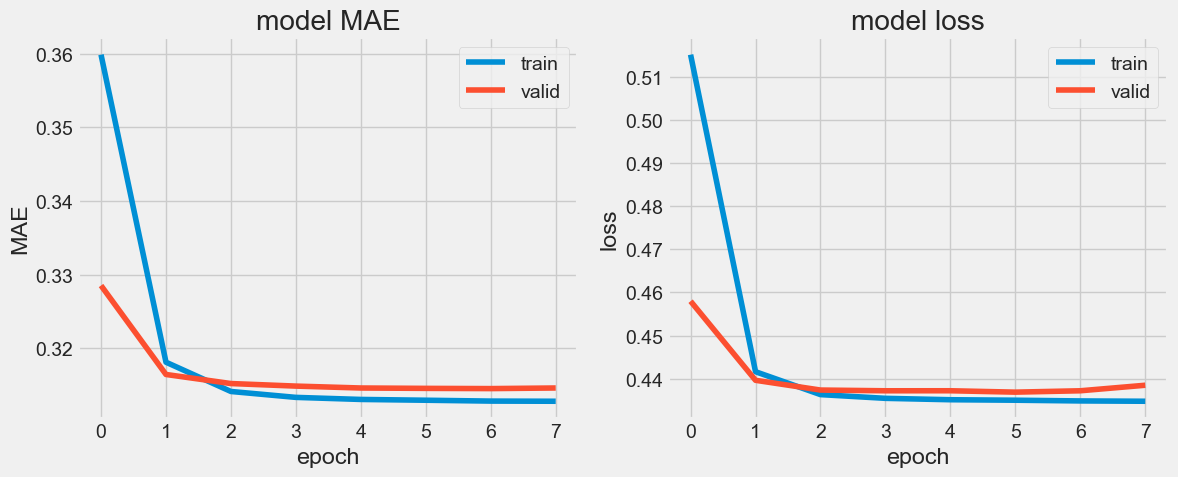

In [103]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph on the left subplot
axs[0].plot(artificial_log.history['mae'])
axs[0].plot(artificial_log.history['val_mae'])
axs[0].set_title('model MAE')
axs[0].set_ylabel('MAE')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'valid'], loc='upper right')

# Plot the second graph on the right subplot
axs[1].plot(artificial_log.history['loss'])
axs[1].plot(artificial_log.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'valid'], loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()

In [102]:
y_pred = artificial_model.predict(X_test)
test_r2_score = r2_score(y_test , y_pred)
print(f'Test Set R2 Score = {test_r2_score}')

1980/1980 [==============================] - 1s 656us/step
Test Set R2 Score = 0.37196126899459436
